
# Activity

# Linear Regression (Wednesday)


    X-y split (y is the target variable, which is the total claim amount)
    Train-test split.
    Standardize the data (after the data split).
    Apply linear regression.
    Model Interpretation.



# Model Validation (Thursday)

    Model Evaluation:
        MSE.
        RMSE.
        MAE.
        R2.
        Adjusted R2.
    Feature Importance.

# Model Iteration (Thursday and Friday)

    Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
    (Optional) Please rerun the model after removing the outliers and compare the results using R2 metric.





In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50


In [2]:
# load ding data 

CA = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
# checking for data types

CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [4]:
# displaying columns

CA.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
# checking for highly correlated columns (output empty list, because no correlation > 0.75)

corr_matrix = CA.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

[]

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

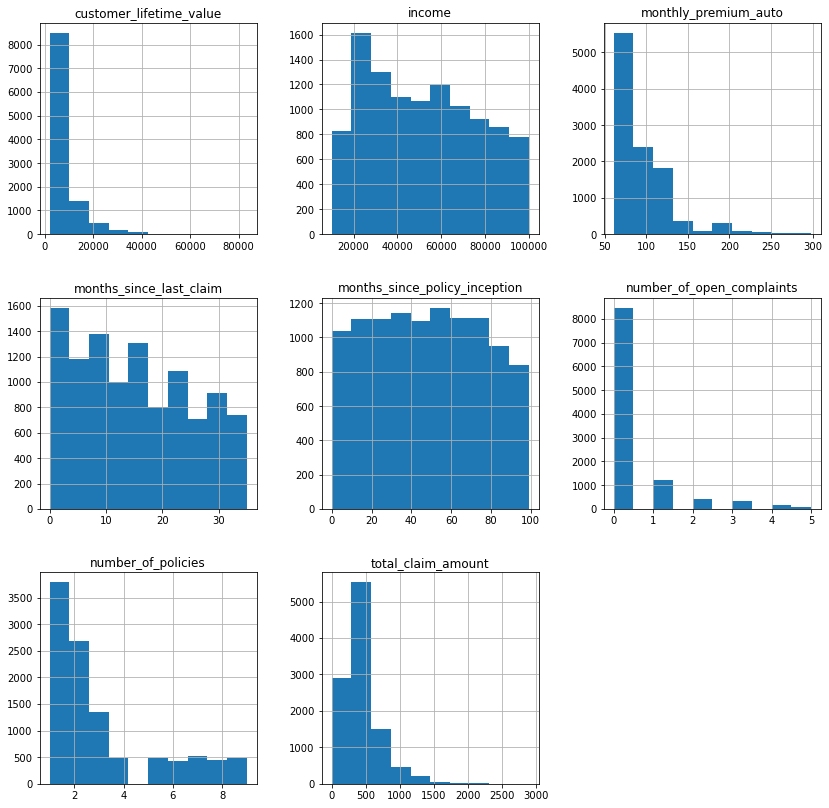

In [6]:
# checking distribution in histograms (for numerical values only)

CA.hist(figsize = (14, 14))

In [84]:
CA["coverage"].unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [195]:
# displaying object in table 

categoricals_features = CA.select_dtypes("object")
categoricals_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [107]:
categoricals_features.drop(["effective_to_date"], axis = 1, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [196]:
categoricals_features = pd.get_dummies(categoricals_features[["employment_status", "gender", "location_code", "marital_status", "month", "policy_type", "policy", "region", "response", "sales_channel", "vehicle_class"]])
categoricals_features

,employment_status_disabled,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_f,gender_m,location_code_rural,location_code_suburban,location_code_urban,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
10686,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10687,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [197]:
categoricals_features.columns

Index(['employment_status_disabled', 'employment_status_employed',
       'employment_status_medical leave', 'employment_status_retired',
       'employment_status_unemployed', 'gender_f', 'gender_m',
       'location_code_rural', 'location_code_suburban', 'location_code_urban',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'month_feb', 'month_jan',
       'policy_type_corporate auto', 'policy_type_personal auto',
       'policy_type_special auto', 'policy_corporate l1',
       'policy_corporate l2', 'policy_corporate l3', 'policy_personal l1',
       'policy_personal l2', 'policy_personal l3', 'policy_special l1',
       'policy_special l2', 'policy_special l3', 'region_central',
       'region_east', 'region_north west', 'region_west region', 'response_no',
       'response_yes', 'sales_channel_agent', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_four-door car', 'vehicle_class_luxu

In [109]:
CA["vehicle_size"].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [128]:
ordinals_features = CA[["coverage", "education", "number_of_open_complaints", "renew_offer_type", "vehicle_size"]]

In [137]:
ordinals_features

,coverage,education,number_of_open_complaints,renew_offer_type,vehicle_size
0,basic,college,0,offer3,medsize
1,basic,college,0,offer4,medsize
2,basic,bachelor,0,offer3,medsize
3,extended,college,0,offer2,medsize
4,premium,bachelor,0,offer1,medsize
...,...,...,...,...,...
10684,premium,bachelor,0,offer3,medsize
10685,basic,college,0,offer2,medsize
10686,extended,bachelor,0,offer1,medsize
10687,premium,college,4,offer1,medsize


In [159]:
ordinals_coverage = {"basic": 0, "extended": 1, "premium": 2}

In [160]:
ordinals_features = ordinals_features.replace({"coverage": ordinals_coverage})

In [161]:
ordinals_education = {"high school or below": 0, "college": 1, "bachelor": 2, "master": 3, "doctor": 4}

In [162]:
ordinals_features = ordinals_features.replace({"education": ordinals_education})

In [163]:
ordinals_renew_offer_type = {"offer1": 0, "offer2": 1, "offer3": 2, "offer4": 3}

In [164]:
ordinals_features = ordinals_features.replace({"renew_offer_type": ordinals_renew_offer_type})

In [207]:
ordinals_vehicle_size = {"small": 0, "medsize": 1, "large": 2}

In [208]:
ordinals_features = ordinals_features.replace({"vehicle_size": ordinals_vehicle_size})

In [198]:
ordinals_features

,coverage,education,number_of_open_complaints,renew_offer_type,vehicle_size
0,0,1,0,2,1
1,0,1,0,3,1
2,0,2,0,2,1
3,1,1,0,1,1
4,2,2,0,0,1
...,...,...,...,...,...
10684,2,2,0,2,1
10685,0,1,0,1,1
10686,1,2,0,0,1
10687,2,1,4,0,1


In [199]:
#concatenating nominals and ordinals thereby actualizing categorical features

categoricals_features = pd.concat([categoricals_features, ordinals_features], axis = 1)

In [216]:
categoricals_features["vehicle_size"] = categoricals_features["vehicle_size"].astype("int")

In [219]:
categoricals_features["renew_offer_type"] = categoricals_features["renew_offer_type"].astype("int")

In [274]:
categoricals_features["coverage"] = categoricals_features["renew_offer_type"].astype("int")

In [275]:
categoricals_features["education"] = categoricals_features["renew_offer_type"].astype("int")

In [276]:
categoricals_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   employment_status_disabled       10689 non-null  uint8
 1   employment_status_employed       10689 non-null  uint8
 2   employment_status_medical leave  10689 non-null  uint8
 3   employment_status_retired        10689 non-null  uint8
 4   employment_status_unemployed     10689 non-null  uint8
 5   gender_f                         10689 non-null  uint8
 6   gender_m                         10689 non-null  uint8
 7   location_code_rural              10689 non-null  uint8
 8   location_code_suburban           10689 non-null  uint8
 9   location_code_urban              10689 non-null  uint8
 10  marital_status_divorced          10689 non-null  uint8
 11  marital_status_married           10689 non-null  uint8
 12  marital_status_single            10689 non-nul

In [277]:
# X Y split

X = CA.drop("total_claim_amount", axis = 1)
y = CA.total_claim_amount

In [278]:
X = X._get_numeric_data()

In [279]:
X = pd.concat([X, categoricals_features], axis = 1)

In [280]:
# Data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [281]:
# Standardizing Data

# finding the parameters ( mean, variance from the training set )

std_scaler = StandardScaler().fit(X_train) 

In [282]:
# transforming the training set

X_train_scaled = std_scaler.transform(X_train)

In [283]:
X_train_scaled.shape

(7482, 55)

In [284]:
# use parameters from the training set to transform the test set

X_test_scaled = std_scaler.transform(X_test)

In [285]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ... -0.42500069  1.00907882
   0.16015559]
 [-0.42794064  0.74729478 -0.72925469 ... -0.42500069  0.01801453
  -1.6833584 ]
 [-0.5223013   0.26592193  0.48489091 ... -0.42500069 -0.97304975
   0.16015559]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -0.42500069  1.00907882
  -1.6833584 ]
 [ 2.25575772  0.98537142 -0.78707115 ... -0.42500069  1.00907882
   0.16015559]
 [ 1.18923585  0.68583346 -0.55580532 ...  1.78399907  0.01801453
   0.16015559]]
--------
[[-0.40967729  1.58428551 -0.61362178 ... -0.42500069 -0.97304975
   0.16015559]
 [-0.7597249  -0.93947257 -0.64253    ...  0.67949919 -0.97304975
   0.16015559]
 [ 0.57248529 -1.23371005 -0.90270406 ... -0.42500069 -0.97304975
   0.16015559]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -0.42500069  0.01801453
   0.16015559]
 [-0.42547654 -0.97370317 -0.81597938 ...  0.67949919  0.01801453
   0.16015559]
 [-0.49881985 -0.95695203  0.71615674 ... -0.42500069  0.01801453
   2.00366957]]


In [286]:
# fitting model to Linear Regression, "training" the algorithm 

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [287]:
model.coef_

array([-1.23456850e-01, -4.03610691e+00,  1.71032341e+02,  3.60905212e+00,
        1.80233529e+00,  1.16039769e+15, -5.53700560e-01, -8.47053862e+14,
       -1.99002572e+15, -8.69796670e+14, -6.76250003e+14, -1.79199493e+15,
        1.24140400e+15,  1.24140400e+15, -7.83833692e+14, -9.56510536e+14,
       -7.56378220e+14,  1.21763899e+15,  1.69688940e+15,  1.53122198e+15,
       -4.65468954e+14, -4.65468954e+14,  6.50884834e+14,  1.05265055e+15,
       -2.58165118e+15, -1.03362952e+15, -1.23073408e+15, -1.61991857e+15,
       -2.04641553e+15, -2.50730801e+15, -2.89356177e+15,  7.76642093e+14,
        1.23800120e+15,  1.21455822e+15, -1.21368679e+15, -7.57937144e+14,
       -1.22016301e+15, -1.28977219e+15, -4.71541407e+14, -4.71541407e+14,
       -7.15418704e+13, -6.66326798e+13, -5.93475883e+13, -5.29380261e+13,
       -8.32826780e+13, -2.28088744e+13, -2.32729463e+13, -3.73407100e+13,
       -6.56559493e+13, -6.76087662e+13,  1.11177528e+15, -1.04534574e+15,
       -1.16039769e+15, -

In [288]:
model.intercept_ 

433.64446861331487

In [289]:
# applying prediction via model

y_pred_test = model.predict(X_test_scaled)   
y_pred_train = model.predict(X_train_scaled)

In [290]:
y_pred_test

array([469.72380749, 399.98161999, 156.72380749, ..., 571.3682545 ,
       -25.12368886, 460.56171714])

In [292]:
y_pred_train

array([470.57311172, 450.67479187, 377.47380749, ..., 329.37964909,
       -43.30188828, 551.76302989])

In [293]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [294]:
# comparing predictesd values with test data 

result = pd.DataFrame({"y_test": y_test,"y_pred": y_pred_test})
result

,y_test,y_pred
4665,345,469.723807
4072,345,399.981620
4549,257,156.723807
4211,445,380.280345
3081,523,427.473807
...,...,...
3488,404,359.223807
1667,554,568.198076
1516,350,571.368255
10215,27,-25.123689


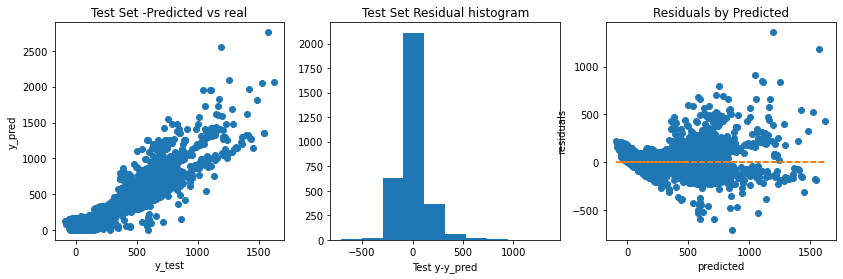

In [295]:
# Graphically evaluating the model: 
# assumption, linearity of predictors, normality of errors, constant variance of errors (here dispersion from zero as baseline, variance of a variable)


fig, ax = plt.subplots(1,3,figsize = (14,4))
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test, y_test - y_pred_test, "o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed')

In [296]:
# checking for MSE 

print(mse(y_test,y_pred_test))


19368.47969779914


In [297]:
# checking for RMSE 

print(math.sqrt(mse(y_test,y_pred_test)))

139.17068548296777


In [298]:
# checking for MAE

print(mae(y_test,y_pred_test))

96.5835760149478


In [299]:
# checking for R2 

R2 = r2_score(y_test,y_pred_test)
R2

0.7678058619230798

In [248]:
# checking for R2-adjusted

Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7651688681347255

In [300]:
# checking for feature importance by coefficient

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by = 'Importance', ascending = False)

features_importances

,Attribute,Importance
30,policy_personal l3,2.893562e+15
24,policy_type_special auto,2.581651e+15
29,policy_personal l2,2.507308e+15
28,policy_personal l1,2.046416e+15
8,employment_status_employed,1.990026e+15
...,...,...
3,months_since_last_claim,3.609052e+00
4,months_since_policy_inception,1.802335e+00
6,number_of_policies,5.537006e-01
54,vehicle_size,4.375000e-01


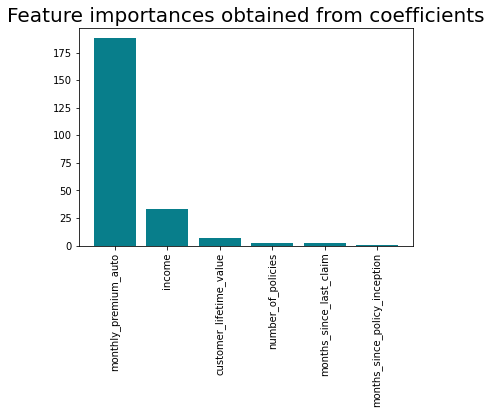

In [249]:
# Plotting feature importance by coefficient

plt.bar(x=features_importances["Attribute"], height = features_importances["Importance"], color = '#087E8B')
plt.title('Feature importances obtained from coefficients', size = 20)
plt.xticks(rotation='vertical')
plt.show()

In [306]:
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'employment_status_disabled', 'employment_status_employed',
       'employment_status_medical leave', 'employment_status_retired',
       'employment_status_unemployed', 'gender_f', 'gender_m',
       'location_code_rural', 'location_code_suburban', 'location_code_urban',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'month_feb', 'month_jan',
       'policy_type_corporate auto', 'policy_type_personal auto',
       'policy_type_special auto', 'policy_corporate l1',
       'policy_corporate l2', 'policy_corporate l3', 'policy_personal l1',
       'policy_personal l2', 'policy_personal l3', 'policy_special l1',
       'policy_special l2', 'policy_special l3', 'region_central',
       'region_east', 'region_north west', 'region_west region', 'respo

In [314]:
# detecting outliers with numpy and interquartile range

Q1 = np.percentile(X, 25, interpolation = 'midpoint')
 
Q3 = np.percentile(X, 75, interpolation = 'midpoint')

IQR = Q3 - Q1

In [322]:
upper = X >= (Q3+1.5*IQR)

np.where(upper)

(array([    0,     0,     0, ..., 10688, 10688, 10688]),
 array([ 0,  1,  2, ..., 50, 51, 53]))

In [340]:
upper_2 = np.where(upper)[0]

In [341]:
upper_1 = np.where(upper)[1]

In [335]:
lower = X <= (Q1-1.5*IQR)

np.where(lower)

(array([], dtype=int64), array([], dtype=int64))

In [342]:
OL = pd.DataFrame({'Outlier1': upper_1, 'Outlier2': upper_2})

In [343]:
OL

,Outlier1,Outlier2
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
60967,3,10688
60968,6,10688
60969,50,10688
60970,51,10688
